<a href="https://colab.research.google.com/github/felixjuliangutierrez/bocadopoder-client/blob/main/Clase2_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** paso alto, paso bajo, direccionales y de detección de bordes en imágenes **

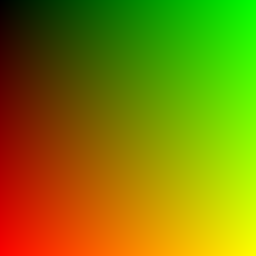

In [ ]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow
v = np.fromfunction(lambda i, j: i, (256, 256), dtype=np.uint8)
h = np.fromfunction(lambda i, j: j, (256, 256), dtype=np.uint8)
z = np.zeros((256, 256), dtype=np.uint8)
img = cv.merge([z, h, v])
cv2_imshow(img)

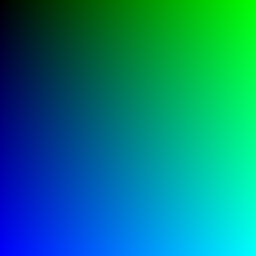

In [ ]:
import cv2 as cv
import numpy as np
def trackbar(x):
  img[:, :, 2] = x
  cv2_imshow(img)
img = np.zeros((256, 256, 3), dtype=np.uint8)
for i in range(256):
  img[i, :, 0] = i
  img[:, i, 1] = i
cv2_imshow(img)


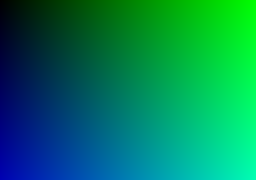

In [ ]:
import cv2 as cv
import numpy as np
def trackbar(x):
  img[:, :, 2] = x
  rgb = cv.cvtColor(img, cv.COLOR_HSV2BGR)
  cv2_imshow(rgb)
img = np.zeros((180, 256, 3), dtype=np.uint8)
for i in range(180):
  img[i, :, 0] = i
for i in range(256):
  img[:, i, 1] = i
cv2_imshow(img)

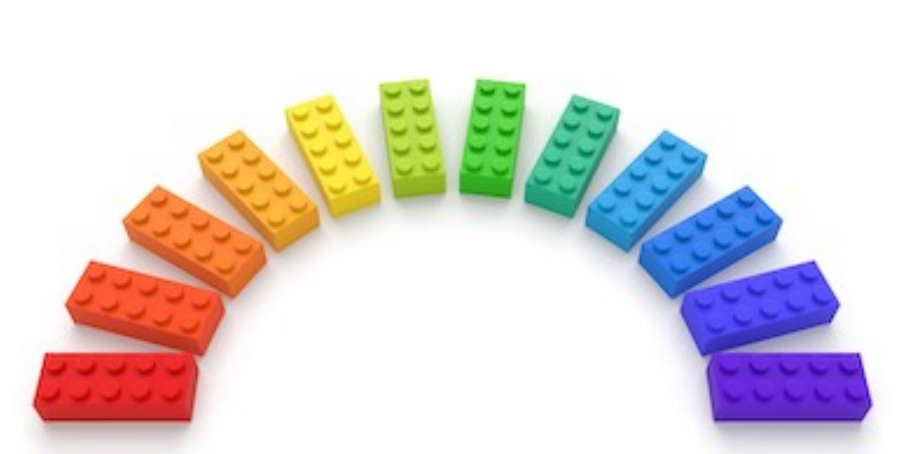

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('legos.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
def trackbar(x):
  lower = (x, 30, 30)
  upper = (x+5, 250, 250)
  mask = cv.inRange(hsv, lower, upper)
  img2 = cv.bitwise_and(img, img, mask=mask)
  cv2_imshow(np.vstack([img, img2]))
cv2_imshow(img)


FILTROS PASA BAJO

**traslación**

M = np.float32([[1, 0, x], [0, 1, y]])

shifted = cv.warpAffine(img, M, size)

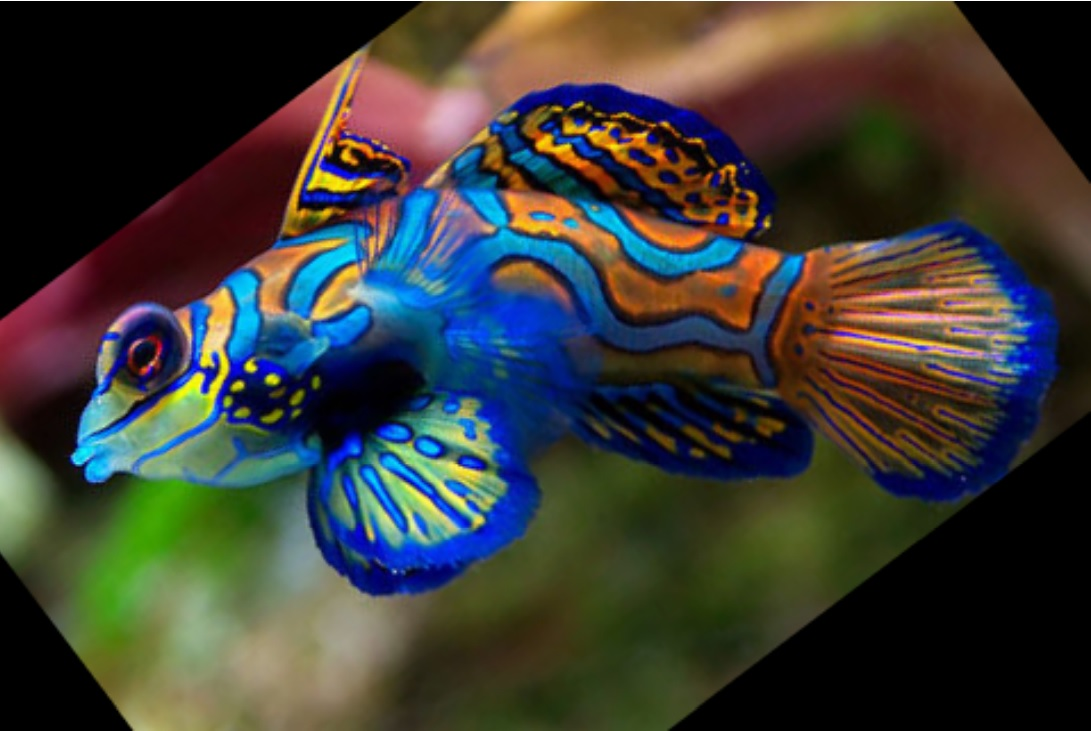

imagen original


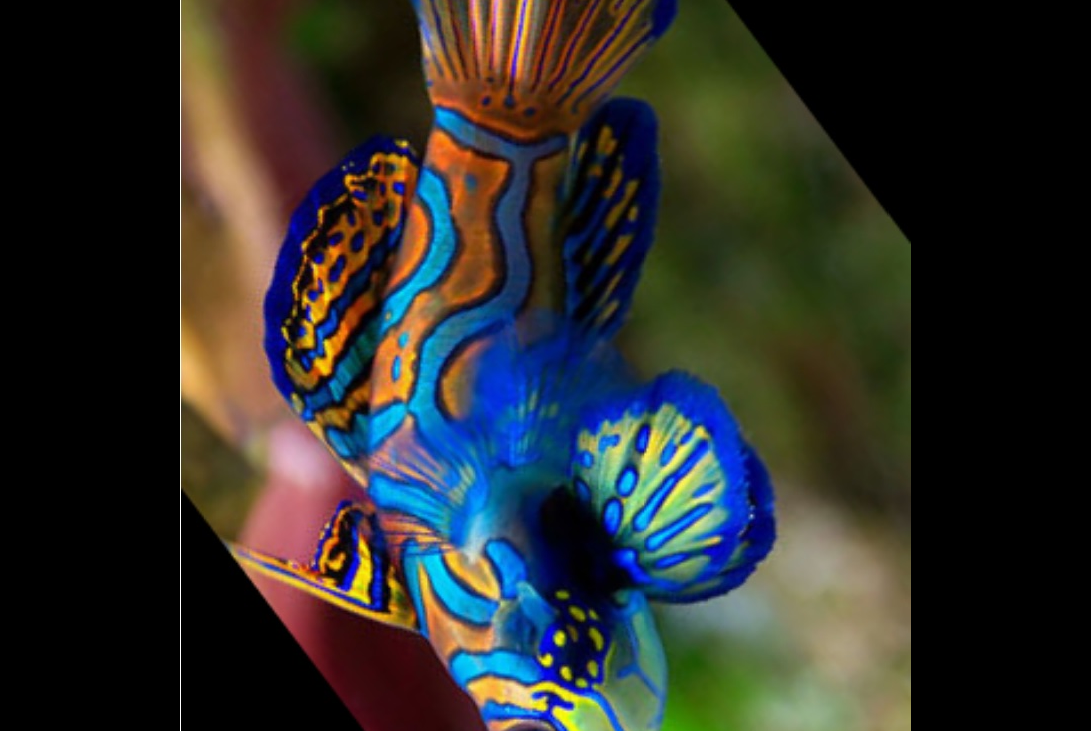

Imagne en rotada


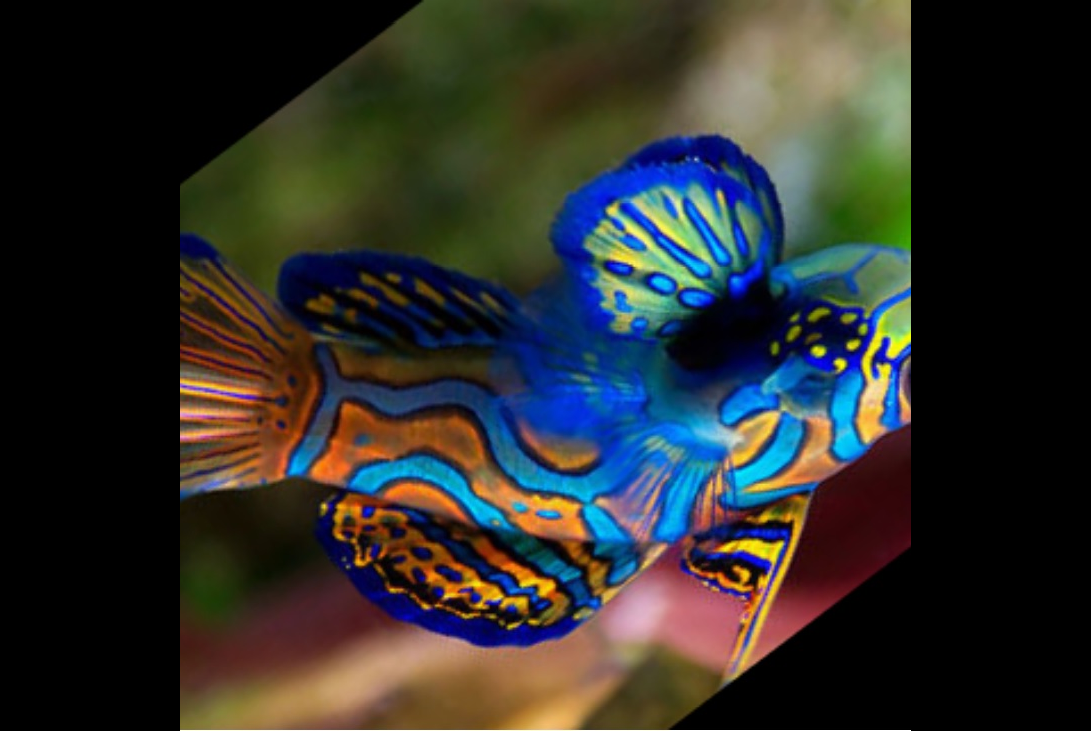

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
angle=90
img = cv.imread('fish.jpg')
h, w = img.shape[:2]
center = w//2, h//2
cv2_imshow(img)
print('imagen original')
M = cv.getRotationMatrix2D(center, angle, 1.0)
rotated = cv.warpAffine(img, M, (w, h))
cv2_imshow(rotated)
print('Imagne en rotada')

shifted = cv.warpAffine(rotated, M,(rotated.shape[1], rotated.shape[0]))
cv2_imshow(shifted)





**Rotación**

h, w = img.shape[:2]

center = w//2, h//2

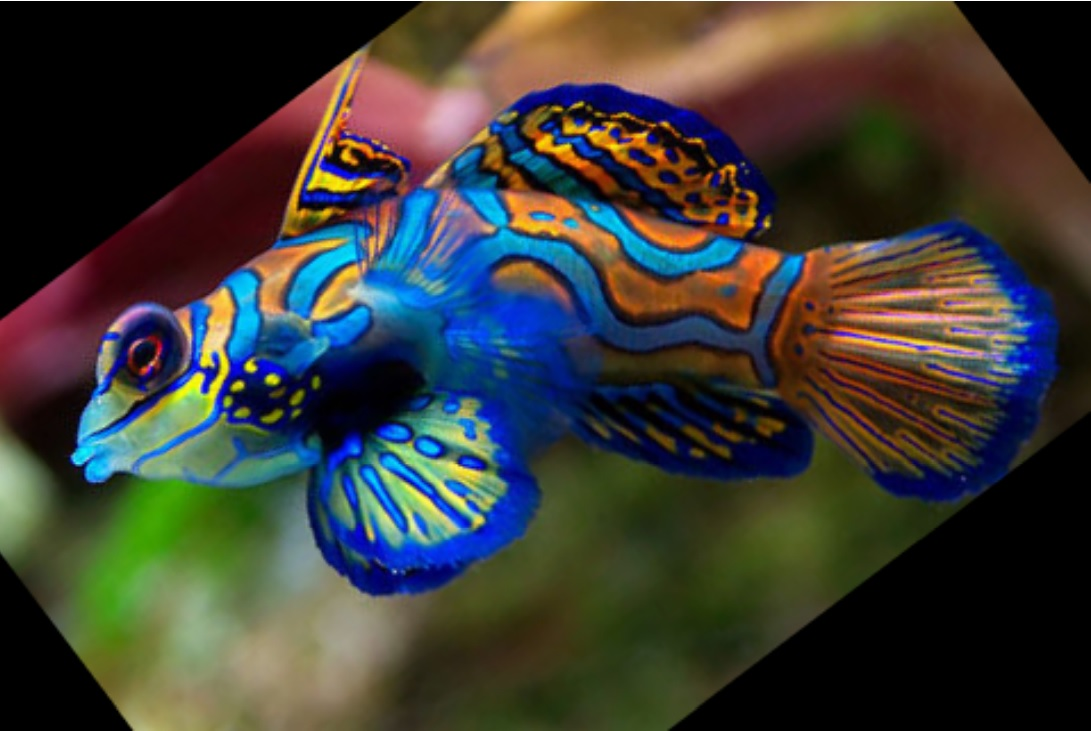

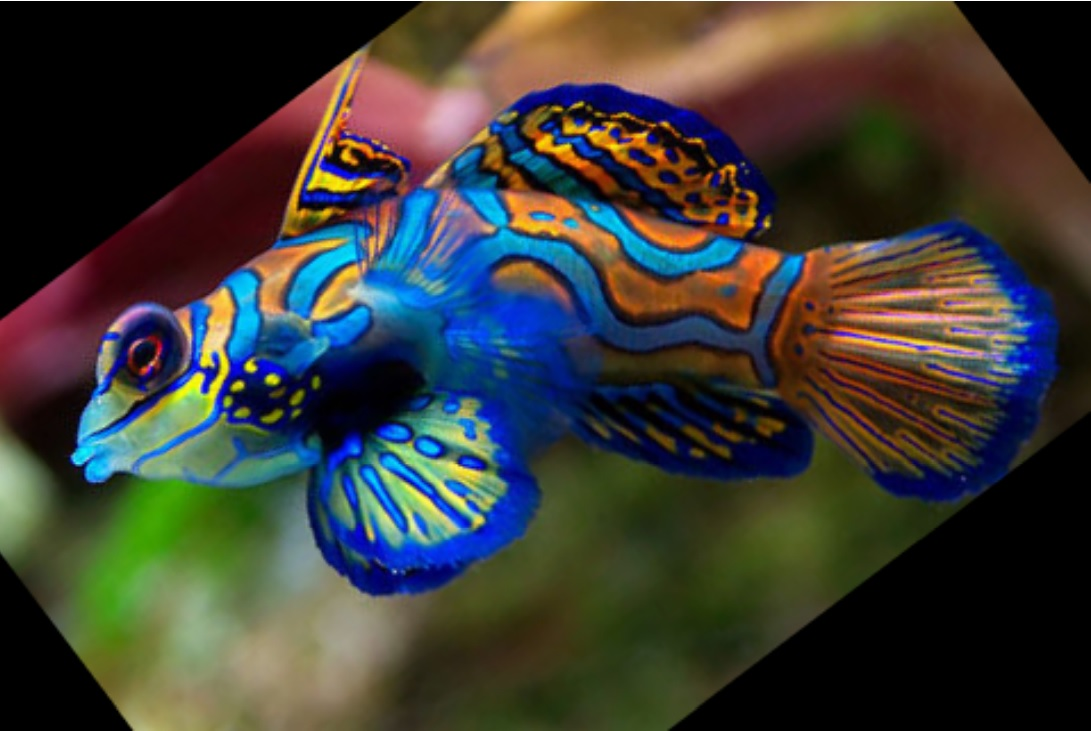

In [ ]:
import cv2 as cv
scale=10
img = cv.imread('fish.jpg')
h, w = img.shape[:2]
center = w//2, h//2
cv2_imshow(img)
M = cv.getRotationMatrix2D(center, 0, scale/10)
rotated = cv.warpAffine(img, M, (w, h))
cv2_imshow(rotated)


Operaciones con imagenes

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('fish.jpg')
img = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_CUBIC)
M = np.ones(img.shape, dtype='uint8') * 100
brighter = cv.add(img, M)
darker = cv.subtract(img, M)
img2 = np.hstack([img, brighter, darker])
cv2_imshow(img2)


TypeError: ignored

# Sección nueva

ENMASCARAMIENTO

In [ ]:
import cv2 as cv
import numpy as np
d = 15
rect = np.zeros((100, 100), np.uint8)
cv.rectangle(rect, (d, d), (100-d, 100-d), 255, -1)
circle = np.zeros((100, 100), np.uint8)
cv.circle(circle, (50, 50), 40, 255, -1)
bit_and = cv.bitwise_and(rect, circle)
bit_or = cv.bitwise_or(rect, circle)
bit_xor = cv.bitwise_xor(rect, circle)
img2 = np.hstack([rect, circle, bit_and, bit_or, bit_xor])
cv2_imshow(img2)

TypeError: ignored

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('fish.jpg')
img = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_CUBIC)
mask = np.zeros(img.shape[:2], dtype='uint8')
#cv2.circle(image, center_coordinates, radius, color, thickness)
cv.circle(mask, (360, 200), 150, 200, -1)
masked = cv.bitwise_and(img, img, mask=mask)
img2 = np.hstack([img, masked])
cv2_imshow(img2)

TypeError: ignored

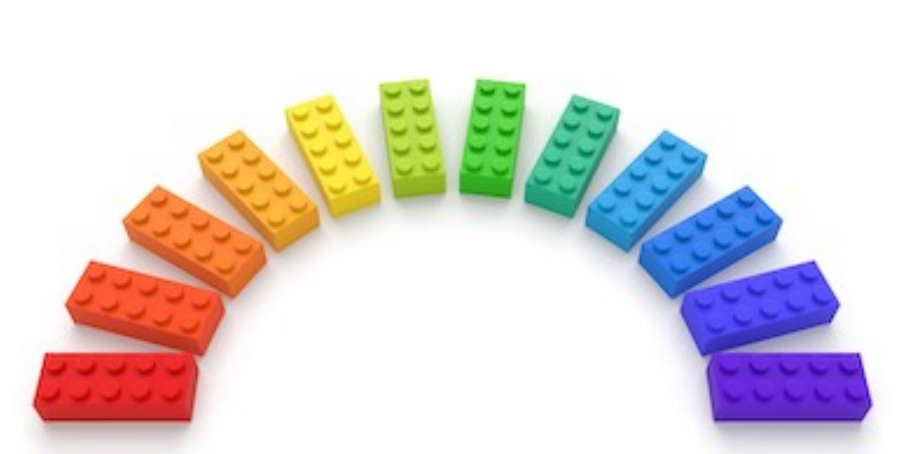

TypeError: ignored

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('legos.jpg')
cv2_imshow(img)
b, g, r = cv.split(img)
img2 = np.hstack([b, g, r])
cv2_imshow(img2)

HSV

(Hue-Saturation-Value)

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('fish.jpg')
img = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_CUBIC)
M = np.ones(img.shape, dtype='uint8') * 40
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
img2 = np.hstack([img, hsv, lab])
cv2_imshow(img2)


TypeError: ignored

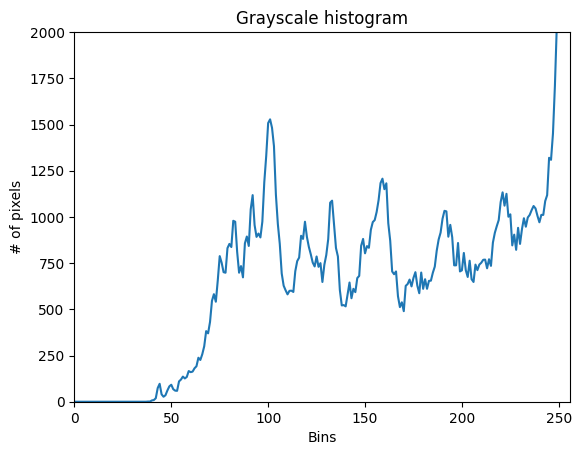

In [ ]:
#histograma blanco y negro
from matplotlib import pyplot as plt
import cv2 as cv
img = cv.imread('legos.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title('Grayscale histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(hist)
plt.xlim([0, 256])
plt.ylim([0, 2000])
plt.show()

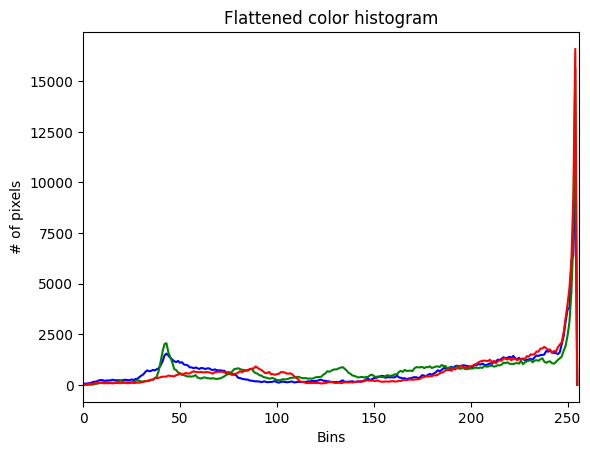

-1

In [ ]:
#histograma a color
from matplotlib import pyplot as plt
import cv2 as cv
img = cv.imread('legos.jpg')
chans = cv.split(img)
colors = 'b', 'g', 'r'
plt.figure()
plt.title('Flattened color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
for (chan, color) in zip(chans, colors):
  hist = cv.calcHist([chan], [0], None, [256], [0, 255])
  plt.plot(hist, color=color)
  plt.xlim([0, 256])
  #plt.ylim([0, 1200])
plt.show()
cv.waitKey(0)

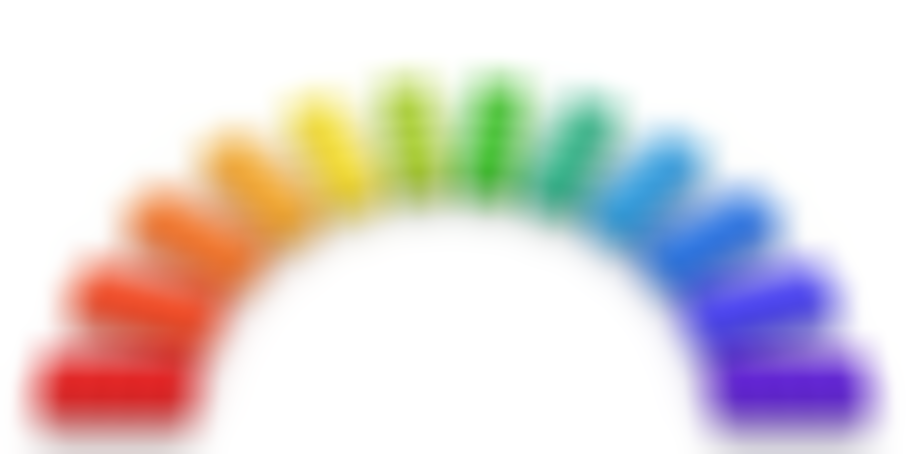

In [ ]:
#Difuminar
import cv2 as cv
import numpy as np


img = cv.imread('legos.jpg')
x = 50
y = 50
blurred = cv.blur(img, (x, y))

cv2_imshow(blurred)

importando librerias, Keras
1. Dense: función usada para extraer caracteristicas de la imagen
2. Conv2D: convolución en 2 dimensiones para imagenes
3. input: usado para inicializar un modelo
4. Maxpooling2D: Agrupación de pixeles para disminución de tamaño de una imagen

EJEMPLO

In [ ]:
from keras.src.layers.attention.multi_head_attention import activation
from keras.src.layers import ReLU
import keras
import keras.backend as K
from keras.layers import Dense, Conv2D, Input, MaxPooling2D, Flatten
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.callbacks import ModelCheckpoint

batch_sz=128
nb_class=10
nb_epoch=10
img_h, img_w=28,28    #dimensiones de entrada


def conv3x3(input_x,nb_filters):
  return Conv2D(nb_filters, kernel_size=(3,3), use_bias=False, activation='relu', padding="same")(input_x)

x=MaxPooling2D(pool_size=(2,2))
preds=Dense(nb_class, activation='softmax')

def create_model(img_h=28, img_w=28):
  inputs=Input(shape=(img_h,img_w,1))
  x=conv3x3(inputs,32)
  x=conv3x3(x,32)
  x=MaxPooling2D(pool_size=(2,2))(x)
  x=conv3x3(x,64)
  x=conv3x3(x,64)
  x=MaxPooling2D(pool_size=(2,2))(x)
  x=conv3x3(x,128)
  x=MaxPooling2D(pool_size=(2,2))(x)
  x=Flatten()(x)
  preds=Dense(nb_class, activation='softmax')(x)
  model=Model(inputs=inputs, outputs=preds)
  print(model.summary())
  return model
def get_dataset():

  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  print("Nb Train:", x_train.shape[0], "Nb test:",x_test.shape[0])
  x_train = x_train.reshape(x_train.shape[0], img_h, img_w, 1)
  x_test = x_test.reshape(x_test.shape[0], img_h, img_w, 1)
  in_shape = (img_h, img_w, 1)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255.0
  x_test /= 255.0
  y_train = keras.utils.to_categorical(y_train, nb_class)
  y_test = keras.utils.to_categorical(y_test,nb_class)
  return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = get_dataset()



SyntaxError: ignored